In [1]:
"""Computation of GH comparisons between Dx matrices"""

"""
Starting from connectivity matrix CX using an algorith we created the Dx matrices. 
Then the Dx matrices are compared using the Gromov-Hausdorff distance and 
we create a GH matrix and we visualize the comparisons. 

__author__ = "Giulia Moreni"
__contact__ = "giulia.moreni1995@gmail.com"
__date__ = "2020/04/15"  
__status__ = "Concluded" 



####################
 Review History   #
####################

Reviewed by Name Date ### 
"""

'\nStarting from connectivity matrix CX using an algorith we created the Dx matrices. \nThen the Dx matrices are compared using the Gromov-Hausdorff distance and \nwe create a GH matrix and we visualize the comparisons. \n\n__author__ = "Giulia Moreni"\n__contact__ = "giulia.moreni1995@gmail.com"\n__date__ = "2020/04/15"  \n__status__ = "Concluded" \n\n\n\n####################\n Review History   #\n####################\n\nReviewed by Name Date ### \n'

In [2]:
####################
# Libraries        #
####################
import pandas as pd #
import matplotlib.pyplot as plt #
import numpy as np # version 1.0.1
import scipy as sio #
import glob #
import math as m #
import seaborn as sns #

In [5]:
#Code to create a big object with all the Dx matices to then create GH matrix
txt_files_dx = glob.glob('Dx_matrix_var01/dx*') #opening all the files I stored in the folder Dx_matrix_var01 
# In the folder I have all the matrices Dx I want to compare
print(txt_files_dx)

dx_matrices_list = [] #dx_matrices_list is the list that will contain all matrix dx uploaded

for i in range(0,len(txt_files_dx)): #Reading the data in the file and create an object which contains all the matrices Dx
    dx_matrices_list.append(np.array(np.loadtxt(txt_files_dx[i])))   

Dx=np.array(dx_matrices_list) #Converting the list with all the matrix in a big numpy array


#Code to create the GH matrix where all the comparison between the Dx matrices are stored
Tot_GH= [[0 for GH_x in range(0,len(Dx))] for GH_y in range(0,len(Dx))] #create the GH matrix filled with 0 

for i in range(0,len(Dx)): #For the matrices in Dx I am comparing all the pairs
    for j in range(i,len(Dx)):
        difference=[] # I store here all the differences between two points of the two matrices
        
        for k in range(0,len(Dx[i])): # for all the pair of values of the two matrices I compute the difference and store the value in list "difference"
            for h in range(k,len(Dx[i])):
                difference.append(abs(Dx[i][k,h]-Dx[j][k,h]))
                
        max_diff= (1/2)*max(difference) # find the maximum between the differences of all the pairs of the two matrixes 
        #max_diff=np.mean(difference) #I can try with this if we want the mean instead of max!
        Tot_GH[i][j]=max_diff      #The value 1/2maxdiff is stored in the GH matrix
        Tot_GH[j][i]= Tot_GH[i][j]       #the matrix is symmetric

        
f=open('GH_var01','w+') #create the file to write the values of th GH matrix
for i in range(0,len(Dx)):
    for j in range(0,len(Dx)):
        f.write('%f ' %Tot_GH[i][j]) # write the value in the i,j position of the matrix 
    f.write('\n')
f.close()

['Dx_matrix_var01\\dx_i=001_n=000.txt', 'Dx_matrix_var01\\dx_i=002_n=000.txt', 'Dx_matrix_var01\\dx_i=003_n=000.txt', 'Dx_matrix_var01\\dx_i=004_n=000.txt', 'Dx_matrix_var01\\dx_i=005_n=000.txt', 'Dx_matrix_var01\\dx_i=006_n=000.txt', 'Dx_matrix_var01\\dx_i=007_n=000.txt', 'Dx_matrix_var01\\dx_i=008_n=000.txt', 'Dx_matrix_var01\\dx_i=009_n=000.txt', 'Dx_matrix_var01\\dx_i=010_n=000.txt']


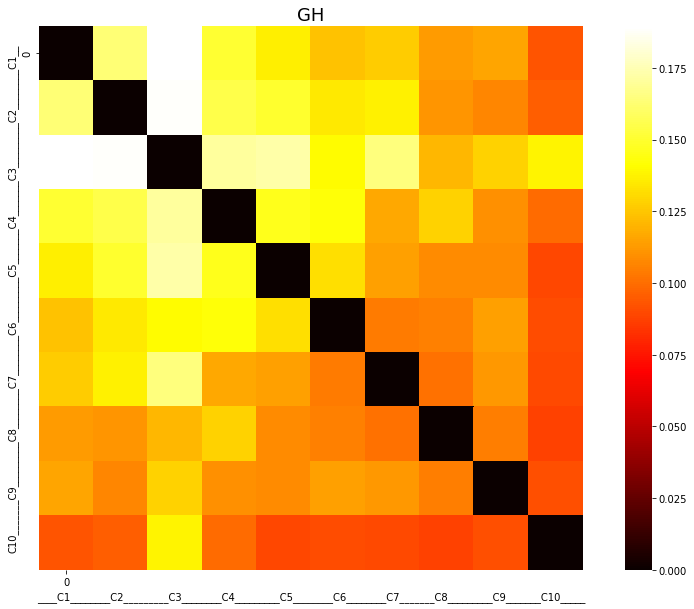

In [7]:
#Plot of the GH matrix 
GH=np.array(np.loadtxt('GH_var01') ) # load the GH matrix in an array to then plot it 
fig = plt.figure(figsize=(15, 10)) #create the figure
GH_plot = sns.heatmap(GH,square=True,cmap='hot',xticklabels=10,yticklabels=10) # plot GH with heatmap

#GH_plot.set(xlim=(0,200),ylim=(200,0)) #set the range of x and y 
plt.title('GH',fontsize=18)
plt.xlabel("____C1________C2_________C3________C4_________C5________C6________C7_______C8_________C9_______C10_____")
plt.ylabel("C10_______C9_________C8________C7________C6_________C5_______C4_______C3_________C2________C1__")
plt.show(GH_plot)

#fig.savefig('GH_var01_mean.png') #save the figure
